In [22]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv('churn.csv')

In [24]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [25]:
## Cleaning 

In [26]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [27]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [28]:
string_cols = list(df.dtypes[df.dtypes=='object'].index)

In [29]:
for col in string_cols: 
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [30]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [31]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [32]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [33]:
df.totalcharges =  df.totalcharges.fillna(0)

In [34]:
df.totalcharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: totalcharges, dtype: float64

In [35]:
df.churn = (df.churn == 'yes').astype(int)

In [36]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [38]:
## Setting up the framework for ML 

In [40]:
from sklearn.model_selection import train_test_split

In [43]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [47]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [49]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [60]:
##EDA

In [52]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [53]:
global_mean = df_train_full.churn.mean()
round(global_mean,3)

0.27

In [54]:
categorical_cols = string_cols + ['seniorcitizen']

categorical_cols.remove('totalcharges')
categorical_cols.remove('churn')
categorical_cols.remove('customerid')

categorical_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'seniorcitizen']

In [56]:
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']

In [57]:
df_train_full[categorical_cols].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
seniorcitizen       2
dtype: int64

In [58]:
# Feature importance 

In [59]:
global_mean

0.26996805111821087

In [64]:
female_mean = df_full_train[df.gender == 'female'].churn.mean()
female_mean.round(3)
male_mean = df_full_train[df.gender == 'male'].churn.mean()
male_mean

/var/folders/tv/6kgdwg3s7fs1tkgvw2yrbyrh0000gn/T/ipykernel_37983/2063405850.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_mean = df_full_train[df.gender == 'female'].churn.mean()
/var/folders/tv/6kgdwg3s7fs1tkgvw2yrbyrh0000gn/T/ipykernel_37983/2063405850.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_mean = df_full_train[df.gender == 'male'].churn.mean()


0.2632135306553911

In [66]:
female_mean/global_mean

1.0253955354648652

In [67]:
male_mean/global_mean

0.9749802969838747

In [69]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [70]:
df_group  = df_train_full.groupby(by='gender').churn.agg(['mean'])

In [73]:
df_group['diff'] = df_group['mean'] - global_mean
df_group['ratio'] = df_group['mean'] / global_mean
df_group

,mean,diff,ratio
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [74]:
from IPython.display import display

In [77]:
for col in categorical_cols: 
    df_group = df_full_train.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['ratio'] = df_group['mean'] / global_mean
    display(df_group)
    print()

,mean,diff,ratio
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,ratio
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,ratio
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,ratio
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,ratio
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,ratio
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,ratio
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,ratio
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,ratio
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,ratio
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,ratio
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,ratio
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,ratio
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,ratio
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,ratio
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


,mean,diff,ratio
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


In [85]:
## Feature Importance (Mututal Score)

In [79]:
from sklearn.metrics import mutual_info_score

In [84]:
def calculate_mi(series):
    return mutual_info_score(df_train_full.churn , series)

df_mi = df_train_full[categorical_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False)

df_mi[:]

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [86]:
## Feature importance, correlation

In [88]:
df_train_full[numerical_cols].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [89]:
## One-hot encoding

In [91]:
from sklearn.feature_extraction import DictVectorizer

In [92]:
dv = DictVectorizer(sparse=False)

In [93]:
dicts = df_train[categorical_cols+ numerical_cols].to_dict(orient='records')

In [96]:
dicts[:2]

[{'gender': 'female',
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'seniorcitizen': 0,
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'seniorcitizen': 0,
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55}]

In [97]:
X_train = dv.fit_transform(dicts)

In [98]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [100]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [111]:
df_full_train.contract.value_counts().head(2).index

Index(['month-to-month', 'two_year'], dtype='object', name='contract')

In [113]:
# one task is to select only required cols from this output

In [118]:
df = pd.DataFrame(X_train, columns=dv.get_feature_names_out())

In [119]:
df

,contract=month-to-month,contract=one_year,contract=two_year,dependents=no,dependents=yes,deviceprotection=no,deviceprotection=no_internet_service,deviceprotection=yes,gender=female,gender=male,...,streamingmovies=no_internet_service,streamingmovies=yes,streamingtv=no,streamingtv=no_internet_service,streamingtv=yes,techsupport=no,techsupport=no_internet_service,techsupport=yes,tenure,totalcharges
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,72.0,8425.15
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,1021.55
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,413.65
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,356.10
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.0,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,52.0,4079.55
4221,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,18.0,476.80
4222,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,190.05
4223,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.0,761.95


In [120]:
del df['techsupport=no_internet_service']

In [121]:
df

,contract=month-to-month,contract=one_year,contract=two_year,dependents=no,dependents=yes,deviceprotection=no,deviceprotection=no_internet_service,deviceprotection=yes,gender=female,gender=male,...,streamingmovies=no,streamingmovies=no_internet_service,streamingmovies=yes,streamingtv=no,streamingtv=no_internet_service,streamingtv=yes,techsupport=no,techsupport=yes,tenure,totalcharges
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,72.0,8425.15
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,10.0,1021.55
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,413.65
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,356.10
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,52.0,4079.55
4221,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.0,476.80
4222,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,190.05
4223,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,761.95


In [124]:
X = df.values

In [125]:
## Logistic Regression

In [127]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [128]:
z= np.linspace(-7,7,1000)
z

array([-7.        , -6.98598599, -6.97197197, -6.95795796, -6.94394394,
       -6.92992993, -6.91591592, -6.9019019 , -6.88788789, -6.87387387,
       -6.85985986, -6.84584585, -6.83183183, -6.81781782, -6.8038038 ,
       -6.78978979, -6.77577578, -6.76176176, -6.74774775, -6.73373373,
       -6.71971972, -6.70570571, -6.69169169, -6.67767768, -6.66366366,
       -6.64964965, -6.63563564, -6.62162162, -6.60760761, -6.59359359,
       -6.57957958, -6.56556557, -6.55155155, -6.53753754, -6.52352352,
       -6.50950951, -6.4954955 , -6.48148148, -6.46746747, -6.45345345,
       -6.43943944, -6.42542543, -6.41141141, -6.3973974 , -6.38338338,
       -6.36936937, -6.35535536, -6.34134134, -6.32732733, -6.31331331,
       -6.2992993 , -6.28528529, -6.27127127, -6.25725726, -6.24324324,
       -6.22922923, -6.21521522, -6.2012012 , -6.18718719, -6.17317317,
       -6.15915916, -6.14514515, -6.13113113, -6.11711712, -6.1031031 ,
       -6.08908909, -6.07507508, -6.06106106, -6.04704705, -6.03

In [131]:
import matplotlib.pyplot as plt

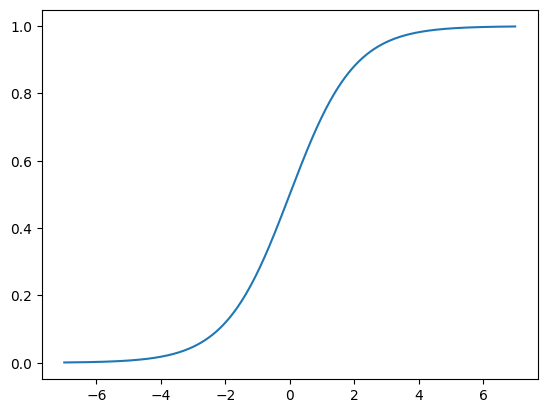

In [132]:
plt.plot(z, sigmoid(z))

In [133]:
# Using the library

from sklearn.linear_model import LogisticRegression

In [134]:
model = LogisticRegression()

In [136]:
model.fit(X_train, df_train.churn)

LogisticRegression()

In [137]:
model.coef_

array([[ 4.74728989e-01, -1.74869006e-01, -4.07540172e-01,
        -2.96902290e-02, -7.79899595e-02,  6.26829693e-02,
        -8.89744467e-02, -8.13887111e-02, -3.43109338e-02,
        -7.33692547e-02, -3.35203862e-01,  3.16498120e-01,
        -8.89744467e-02,  3.67464279e-03, -2.58135772e-01,
         1.41441033e-01,  9.01455016e-03,  6.25302301e-02,
        -8.89744467e-02, -8.12359718e-02,  2.65580955e-01,
        -8.89744467e-02, -2.84286697e-01, -2.31200043e-01,
         1.23519854e-01, -1.66024719e-01,  5.83445301e-02,
        -8.70071706e-02, -3.20564699e-02,  7.04811082e-02,
        -5.90976563e-02,  1.41441033e-01, -2.49121222e-01,
         2.15470448e-01, -1.20362991e-01, -8.89744467e-02,
         1.01657249e-01, -7.08926581e-02, -8.89744467e-02,
         5.21869163e-02,  2.13375103e-01, -8.89744467e-02,
        -2.32080845e-01, -7.04056028e-02,  3.82373660e-04]])

In [139]:
model.intercept_[0]

-0.10903521054753158

In [142]:
dicts = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(dicts)

In [143]:
y_pred = model.predict_proba(X_val)

In [144]:
churn_decision = y_pred[:,1] >= 0.5

In [146]:
df_val[churn_decision].customerid

2504    8433-wxgna
4597    3440-jpscl
2343    2637-fkfsy
5591    7228-omtpn
4482    6711-fldfb
           ...    
2611    5976-jcjrh
4211    2034-cgrhz
3999    5276-kqwhg
6240    6521-yytyi
5282    3049-solay
Name: customerid, Length: 311, dtype: object

In [148]:
(churn_decision == df_val.churn).mean()

0.8034066713981547

In [153]:
## modle interpertation 

list(zip(dv.get_feature_names_out(),model.coef_[0]))

[('contract=month-to-month', 0.4747289894879337),
 ('contract=one_year', -0.17486900578801876),
 ('contract=two_year', -0.4075401721774871),
 ('dependents=no', -0.02969022896361361),
 ('dependents=yes', -0.07798995952314267),
 ('deviceprotection=no', 0.06268296933931139),
 ('deviceprotection=no_internet_service', -0.08897444674527225),
 ('deviceprotection=yes', -0.08138871107336117),
 ('gender=female', -0.03431093381219623),
 ('gender=male', -0.07336925466927982),
 ('internetservice=dsl', -0.33520386215587095),
 ('internetservice=fiber_optic', 0.316498120418771),
 ('internetservice=no', -0.08897444674527225),
 ('monthlycharges', 0.00367464278844214),
 ('multiplelines=no', -0.25813577167650975),
 ('multiplelines=no_phone_service', 0.14144103303785843),
 ('multiplelines=yes', 0.009014550156805507),
 ('onlinebackup=no', 0.06253023006733983),
 ('onlinebackup=no_internet_service', -0.08897444674527225),
 ('onlinebackup=yes', -0.08123597180356219),
 ('onlinesecurity=no', 0.2655809553810022),

In [154]:
## Using the model 

In [168]:
#let's first do a full train 

dicts = df_full_train[categorical_cols+numerical_cols].to_dict(orient='records')


In [170]:
X_full_train = dv.fit_transform(dicts)

In [173]:
y_full_train = df_full_train.churn.values

In [174]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [175]:
dict_test = df_test[numerical_cols + categorical_cols].to_dict(orient='records')

In [176]:
X_test = dv.fit_transform(dict_test)

In [179]:
y_pred = model.predict(X_test)

In [181]:
(y_pred == df_test.churn.values).mean()

0.815471965933286

In [182]:
customer = df_test.iloc[10].to_dict()

In [183]:
del customer['churn']

In [158]:
customer

{'customerid': '0111-klbqg',
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'tenure': 32,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [159]:
X_customer = dv.transform(customer)

In [160]:
X_customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [163]:
model.predict(X_customer)[0]

1

In [164]:
df_test.iloc[10].churn

0

In [165]:
model.predict_proba(X_customer)

array([[0.45947494, 0.54052506]])